In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [46]:
data=pd.read_csv("S&P500.csv")
data

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.40,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.40,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.40,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.40,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.40,12.27,5.33,98.93,5.29,8.14,NaN
...,...,...,...,...,...,...,...,...,...,...
1763,2017-12-01,2664.34,48.93,109.88,246.52,2.40,2700.13,49.59,111.36,32.09
1764,2018-01-01,2789.80,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31
1765,2018-02-01,2705.16,49.64,NaN,248.99,2.86,2714.34,49.81,NaN,32.12
1766,2018-03-01,2702.77,50.00,NaN,249.55,2.84,2705.82,50.06,NaN,31.99


In [47]:
data1950=data[["Date","SP500"]][data["Date"]>='1950-01-01']
data1950 = data1950.reset_index().drop(columns=["index","Date"])
data1950= data1950.reset_index()
data1950=data1950.rename(columns={"index":"mesi trascorsi"})
data1950

,mesi trascorsi,SP500
0,0,16.88
1,1,17.21
2,2,17.35
3,3,17.84
4,4,18.44
...,...,...
815,815,2664.34
816,816,2789.80
817,817,2705.16
818,818,2702.77


In [48]:
Y=data1950["SP500"].values
Y

array([  16.88,   17.21,   17.35,   17.84,   18.44,   18.74,   17.38,
         18.43,   19.08,   19.87,   19.83,   19.75,   21.21,   22.  ,
         21.63,   21.92,   21.93,   21.55,   21.93,   22.89,   23.48,
         23.36,   22.71,   23.41,   24.19,   23.75,   23.81,   23.74,
         23.73,   24.38,   25.08,   25.18,   24.78,   24.26,   25.03,
         26.04,   26.18,   25.86,   25.99,   24.71,   24.84,   23.95,
         24.29,   24.39,   23.27,   23.97,   24.5 ,   24.83,   25.46,
         26.02,   26.57,   27.63,   28.73,   28.96,   30.13,   30.73,
         31.45,   32.18,   33.44,   34.97,   35.6 ,   36.79,   36.5 ,
         37.76,   37.6 ,   39.78,   42.69,   42.43,   44.34,   42.11,
         44.95,   45.37,   44.15,   44.43,   47.49,   48.05,   46.54,
         46.27,   48.78,   48.49,   46.84,   46.24,   45.76,   46.44,
         45.43,   43.47,   44.03,   45.05,   46.78,   47.55,   48.51,
         45.84,   43.98,   41.24,   40.35,   40.33,   41.12,   41.26,
         42.11,   42

In [49]:
X=data1950["mesi trascorsi"].values
X

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

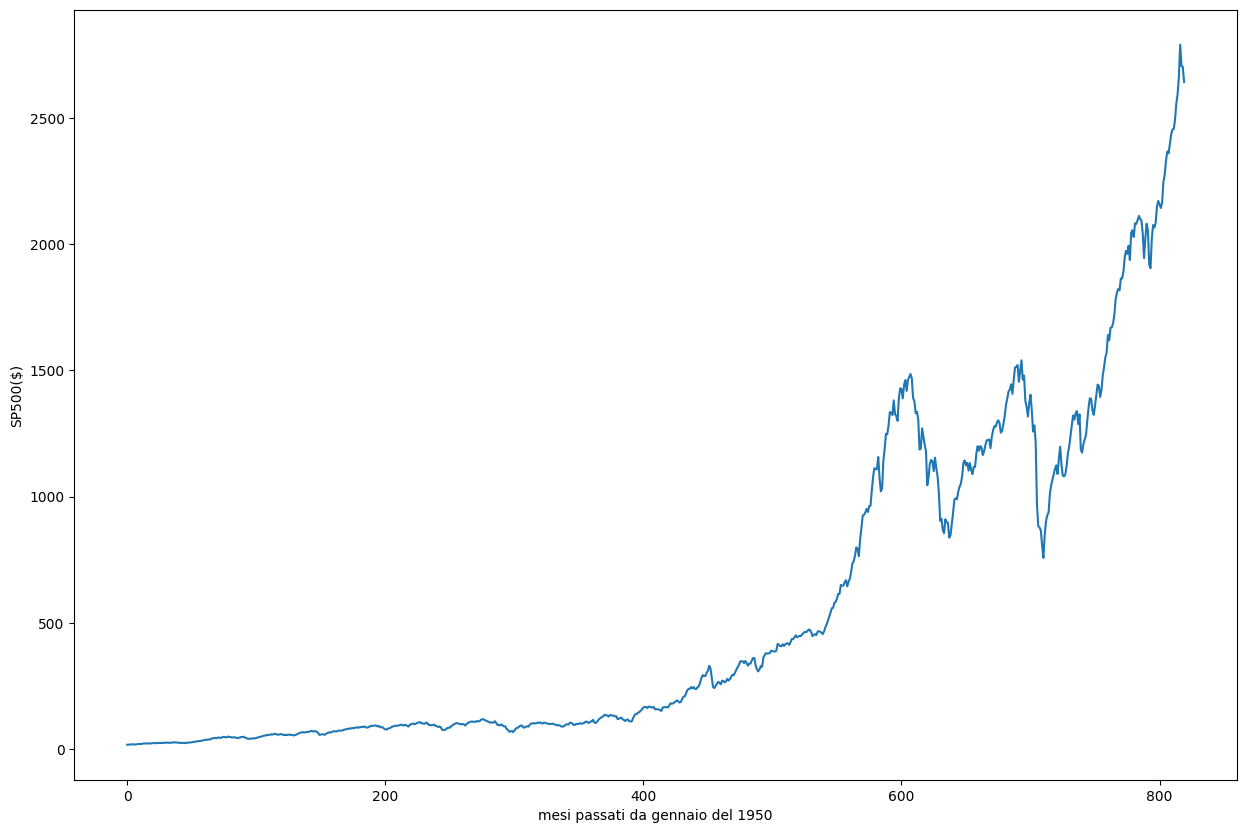

In [65]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(X,Y)
ax.set_xlabel("mesi passati da gennaio del 1950")
ax.set_ylabel("SP500($)")
plt.show()

In [69]:
sc_x1=StandardScaler()
sc_y1=StandardScaler()
X_n=X[:,np.newaxis]
Y_n=Y[:,np.newaxis]
X_sc1=sc_x1.fit_transform(X_n)
Y_sc1=sc_y1.fit_transform(Y_n)

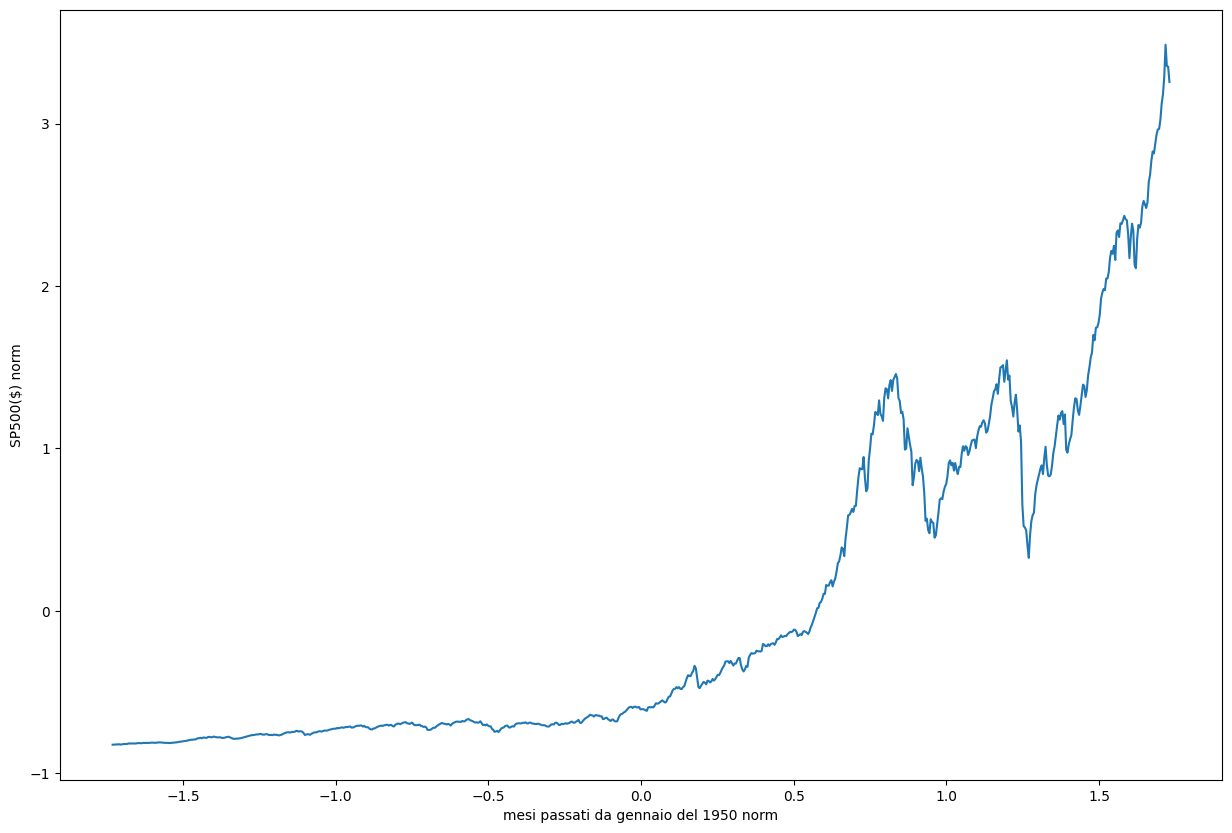

In [72]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(X_sc1,Y_sc1)
ax.set_xlabel("mesi passati da gennaio del 1950 norm")
ax.set_ylabel("SP500($) norm")
plt.show()

In [74]:
sc_x1.transform([[1]])

array([[-1.72571532]])

In [77]:
sc_x1.inverse_transform([[-1.72571532]])

array([[0.9999999]])

In [52]:
model1=LinearRegression()

In [53]:
model1.fit(X_sc1,Y_sc1)

LinearRegression()

In [78]:
model1.score(X_sc1,Y_sc1)

0.7501589700944247

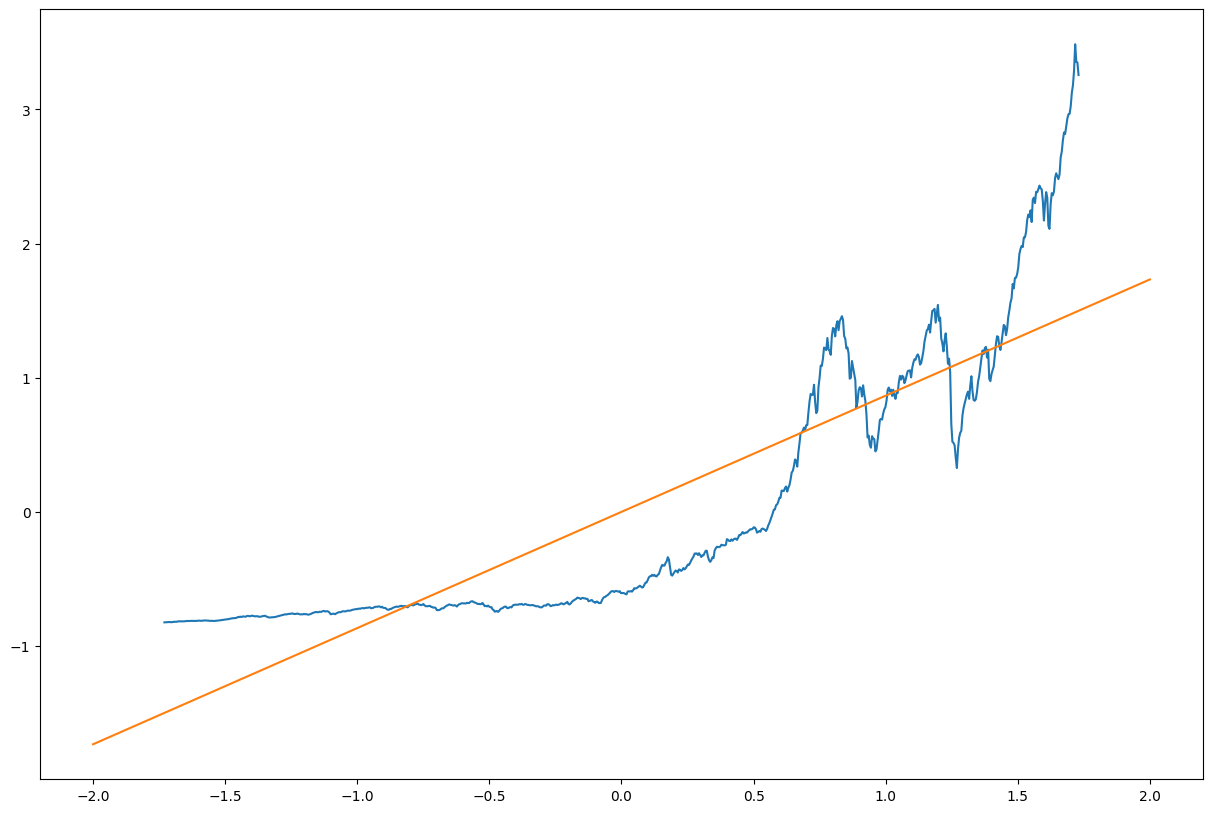

In [81]:
array_x=np.linspace(-2,2,100)
array_y=model1.coef_[0][0]*array_x
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(X_sc1,Y_sc1)

ax.plot(array_x,array_y)
plt.show()

In [57]:
Y_ln=np.log(data1950["SP500"].values)
Y_ln

array([2.82612949, 2.84549061, 2.85359251, 2.88144313, 2.91452222,
       2.93066028, 2.85532012, 2.91397977, 2.94864067, 2.98921106,
       2.98719594, 2.98315349, 3.05447277, 3.09104245, 3.07408124,
       3.08739946, 3.08785556, 3.07037582, 3.08785556, 3.13070013,
       3.15614899, 3.15102516, 3.12280536, 3.15316328, 3.18593932,
       3.16758253, 3.17010566, 3.16716139, 3.16674007, 3.19376312,
       3.22207072, 3.22605003, 3.21003688, 3.1888289 , 3.22007511,
       3.25963382, 3.26499576, 3.25269737, 3.25771185, 3.20720802,
       3.21245526, 3.17596832, 3.19006474, 3.19417321, 3.14716498,
       3.17680305, 3.19867312, 3.2120526 , 3.23710859, 3.25886547,
       3.27978276, 3.31890214, 3.35794187, 3.36591557, 3.40552135,
       3.42523938, 3.44839898, 3.47134514, 3.50975279, 3.55449055,
       3.57234564, 3.60522607, 3.59731226, 3.63125034, 3.62700405,
       3.68336427, 3.7539647 , 3.74785566, 3.7918872 , 3.74028524,
       3.80555076, 3.81485109, 3.78759293, 3.79391492, 3.86051

In [58]:
sc_x=StandardScaler()
sc_y=StandardScaler()
X_n=X[:,np.newaxis]
Y_ln_n=Y_ln[:,np.newaxis]
X_sc=sc_x.fit_transform(X_n)
Y_sc=sc_y.fit_transform(Y_ln_n)
Y_sc

array([[-1.89226914],
       [-1.87835365],
       [-1.87253054],
       [-1.85251336],
       [-1.8287383 ],
       [-1.81713933],
       [-1.87128885],
       [-1.82912817],
       [-1.80421622],
       [-1.77505691],
       [-1.77650524],
       [-1.77941068],
       [-1.72815111],
       [-1.70186724],
       [-1.71405784],
       [-1.70448558],
       [-1.70415777],
       [-1.71672105],
       [-1.70415777],
       [-1.67336393],
       [-1.65507297],
       [-1.65875564],
       [-1.67903817],
       [-1.6572189 ],
       [-1.63366165],
       [-1.6468553 ],
       [-1.64504184],
       [-1.64715799],
       [-1.64746081],
       [-1.62803842],
       [-1.6076928 ],
       [-1.60483274],
       [-1.61634193],
       [-1.63158482],
       [-1.60912711],
       [-1.58069493],
       [-1.57684112],
       [-1.58568039],
       [-1.58207632],
       [-1.61837512],
       [-1.61460376],
       [-1.64082815],
       [-1.63069658],
       [-1.62774368],
       [-1.66153009],
       [-1

In [59]:
model2=LinearRegression()

In [60]:
model2.fit(X_sc,Y_sc)

LinearRegression()

In [85]:
model2.score(X_sc,Y_sc)

0.9593355675599384

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


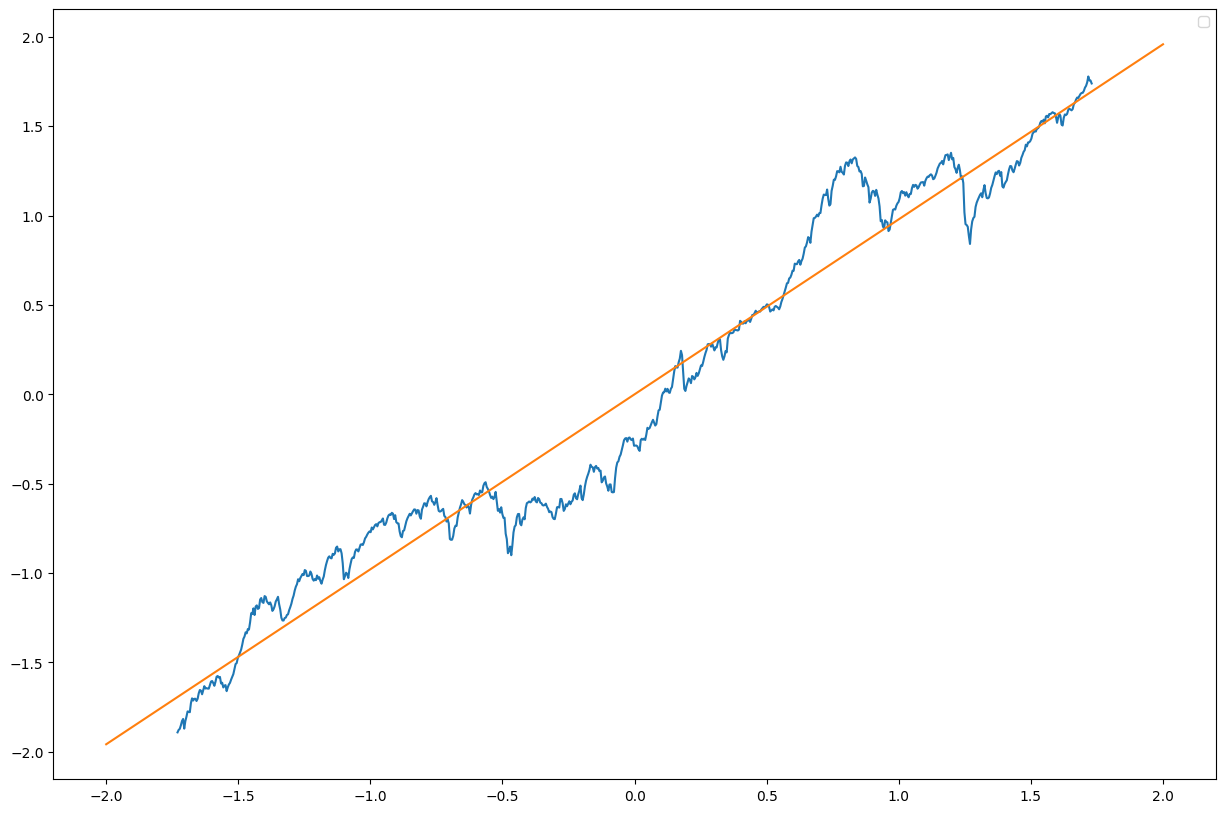

In [91]:
array_x2=np.linspace(-2,2,100)
array_y2=model2.coef_[0][0]*array_x2
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(X_sc,Y_sc)
ax.plot(array_x2,array_y2)
ax.legend()
plt.show()

In [98]:
norm_877=sc_x.transform([[860]])

norm_predict=model2.predict(norm_877)
ln_norm_predict=sc_y.inverse_transform(norm_predict)
np.exp(ln_norm_predict)

array([[3141.41368878]])

In [ ]:
data=pd.read_csv()